# Stock Market Predictor 

using Kaggle data https://www.kaggle.com/datasets/akram24/google-stock-price-train?resource=download

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 1: Import Data

In [4]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Explaining Data

    Open = the price at wich the stock started traning when the market opened on a particular day
    
    Close = The price at wich an individual stock was when the market closed 

    High = highest price at wich the stock traded during a period

    Low = Lowest price at wich a stock traded during a period

    Volume = Total amount of traning activity during a time 

# Part 2: Feature Analysis

<Axes: >

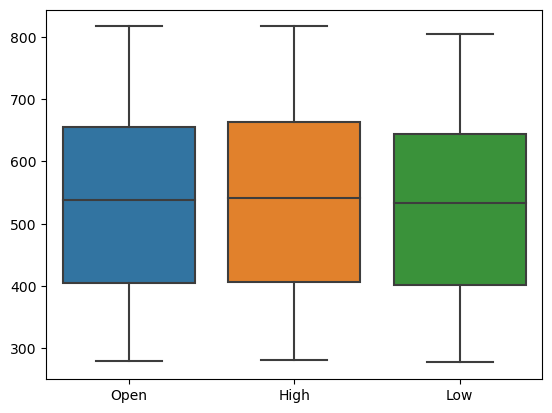

In [5]:
sns.boxplot(data=df)

# Convert Date to appropriate stamp

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [8]:
#Now you can drop the date coloumn
df.drop('Date', axis=1, inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
 5   Year    1258 non-null   int64  
 6   Month   1258 non-null   int64  
 7   Day     1258 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 78.8+ KB


In [11]:
# Convert Close and volume to floats
df['Close'] = pd.to_numeric(df['Close'])
df['Volume'] = df['Volume'].astype(float)

ValueError: Unable to parse string "1,008.64" at position 451

In [12]:
df['Close']= df['Close'].apply(lambda x : float(x.replace(",", "")))

In [13]:
#Converting String object to float
df['Volume'] = df['Volume'].apply(lambda x : float(x.replace(",", "")))

In [14]:
# Convert Close and volume to floats
df['Close'] = pd.to_numeric(df['Close'])
df['Volume'] = df['Volume'].astype(float)

<Axes: >

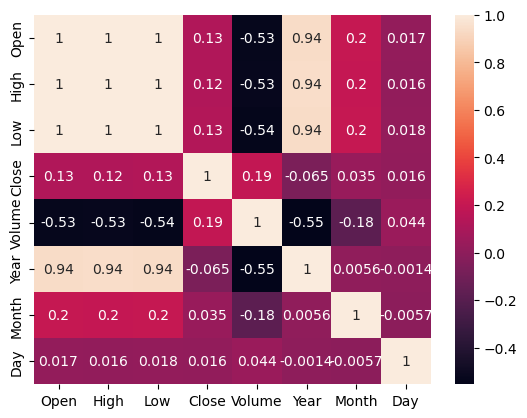

In [15]:
sns.heatmap(df.corr(), annot=True)

# Take away 

From this we can see that the open, high and low data are all strongly correclated so we could drop 2 of the 3 coloumns
This would yield the same if not similar result

therfore there is no advantage of adding all three

In [16]:
#Drop high and low coloumn as they are not needed
df.drop(['High', 'Low'], axis=1, inplace=True)

In [17]:
df.head()

,Open,Close,Volume,Year,Month,Day
0,325.25,663.59,7380500.0,2012,1,3
1,331.27,666.45,5749400.0,2012,1,4
2,329.83,657.21,6590300.0,2012,1,5
3,328.34,648.24,5405900.0,2012,1,6
4,322.04,620.76,11688800.0,2012,1,9


# Create our test and train data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Close', axis=1)
y = df['Close']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Normalize Data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [38]:
model = Sequential()

model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='relu'))
model.compile(optimizer='adam', loss='mse')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=25)

In [40]:
model.fit(x = X_train, 
          y = y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

Epoch 1/600
28/28 [==============================] - 1s 26ms/step - loss: 540109.0000 - val_loss: 521915.8125
Epoch 2/600
28/28 [==============================] - 0s 5ms/step - loss: 538785.3125 - val_loss: 519945.2812
Epoch 3/600
28/28 [==============================] - 0s 4ms/step - loss: 535627.8125 - val_loss: 515508.2812
Epoch 4/600
28/28 [==============================] - 0s 5ms/step - loss: 528725.5625 - val_loss: 506180.9375
Epoch 5/600
28/28 [==============================] - 0s 5ms/step - loss: 515380.4062 - val_loss: 488775.1250
Epoch 6/600
28/28 [==============================] - 0s 5ms/step - loss: 490939.4688 - val_loss: 459374.4375
Epoch 7/600
28/28 [==============================] - 0s 5ms/step - loss: 454109.3438 - val_loss: 415538.0000
Epoch 8/600
28/28 [==============================] - 0s 5ms/step - loss: 401814.5312 - val_loss: 357247.3125
Epoch 9/600
28/28 [==============================] - 0s 5ms/step - loss: 336052.5312 - val_loss: 287681.3125
Epoch 10/600
28/28

28/28 [==============================] - 0s 4ms/step - loss: 58763.0352 - val_loss: 27959.2441
Epoch 77/600
28/28 [==============================] - 0s 4ms/step - loss: 52839.3867 - val_loss: 27780.4277
Epoch 78/600
28/28 [==============================] - 0s 4ms/step - loss: 60192.2461 - val_loss: 27777.3887
Epoch 79/600
28/28 [==============================] - 0s 4ms/step - loss: 57797.6133 - val_loss: 28131.1816
Epoch 80/600
28/28 [==============================] - 0s 4ms/step - loss: 58697.2031 - val_loss: 27877.0156
Epoch 81/600
28/28 [==============================] - 0s 4ms/step - loss: 55956.2305 - val_loss: 27666.8711
Epoch 82/600
28/28 [==============================] - 0s 4ms/step - loss: 54880.5625 - val_loss: 27610.8125
Epoch 83/600
28/28 [==============================] - 0s 4ms/step - loss: 55976.0742 - val_loss: 27245.1406
Epoch 84/600
28/28 [==============================] - 0s 4ms/step - loss: 57122.8125 - val_loss: 27046.3125
Epoch 85/600
28/28 [=====================

28/28 [==============================] - 0s 5ms/step - loss: 50806.9062 - val_loss: 24265.0000
Epoch 152/600
28/28 [==============================] - 0s 5ms/step - loss: 50906.6172 - val_loss: 23371.5078
Epoch 153/600
28/28 [==============================] - 0s 4ms/step - loss: 47606.8672 - val_loss: 23571.0586
Epoch 154/600
28/28 [==============================] - 0s 4ms/step - loss: 50659.9492 - val_loss: 24383.0586
Epoch 155/600
28/28 [==============================] - 0s 5ms/step - loss: 55712.5078 - val_loss: 23416.3809
Epoch 156/600
28/28 [==============================] - 0s 5ms/step - loss: 50382.7266 - val_loss: 23014.8672
Epoch 157/600
28/28 [==============================] - 0s 5ms/step - loss: 56144.1719 - val_loss: 24112.4902
Epoch 158/600
28/28 [==============================] - 0s 5ms/step - loss: 53953.7734 - val_loss: 23864.8672
Epoch 159/600
28/28 [==============================] - 0s 5ms/step - loss: 49076.3398 - val_loss: 23340.9902
Epoch 160/600
28/28 [============

28/28 [==============================] - 0s 4ms/step - loss: 45314.2695 - val_loss: 21274.1289
Epoch 227/600
28/28 [==============================] - 0s 4ms/step - loss: 48595.9180 - val_loss: 21525.5410
Epoch 228/600
28/28 [==============================] - 0s 5ms/step - loss: 46619.0273 - val_loss: 21333.5781
Epoch 229/600
28/28 [==============================] - 0s 5ms/step - loss: 46959.7734 - val_loss: 21604.5039
Epoch 230/600
28/28 [==============================] - 0s 4ms/step - loss: 46669.4609 - val_loss: 21302.2715
Epoch 231/600
28/28 [==============================] - 0s 5ms/step - loss: 49656.1680 - val_loss: 21755.5469
Epoch 232/600
28/28 [==============================] - 0s 5ms/step - loss: 47363.5234 - val_loss: 21063.1211
Epoch 233/600
28/28 [==============================] - 0s 4ms/step - loss: 47008.7383 - val_loss: 21772.3789
Epoch 234/600
28/28 [==============================] - 0s 5ms/step - loss: 48596.4883 - val_loss: 21608.7539
Epoch 235/600
28/28 [============

28/28 [==============================] - 0s 5ms/step - loss: 45333.0273 - val_loss: 19712.8418
Epoch 302/600
28/28 [==============================] - 0s 4ms/step - loss: 41644.1875 - val_loss: 19951.9492
Epoch 303/600
28/28 [==============================] - 0s 4ms/step - loss: 48309.0469 - val_loss: 19991.3164
Epoch 304/600
28/28 [==============================] - 0s 4ms/step - loss: 44183.5469 - val_loss: 19487.6016
Epoch 305/600
28/28 [==============================] - 0s 4ms/step - loss: 42197.1133 - val_loss: 19967.6270
Epoch 306/600
28/28 [==============================] - 0s 5ms/step - loss: 43821.6719 - val_loss: 19316.7715
Epoch 307/600
28/28 [==============================] - 0s 4ms/step - loss: 45353.0664 - val_loss: 19470.0547
Epoch 308/600
28/28 [==============================] - 0s 4ms/step - loss: 44538.3359 - val_loss: 20079.6797
Epoch 309/600
28/28 [==============================] - 0s 4ms/step - loss: 46088.0234 - val_loss: 19388.1992
Epoch 310/600
28/28 [============

28/28 [==============================] - 0s 5ms/step - loss: 42735.3672 - val_loss: 17877.8398
Epoch 377/600
28/28 [==============================] - 0s 5ms/step - loss: 40674.8555 - val_loss: 18217.9941
Epoch 378/600
28/28 [==============================] - 0s 5ms/step - loss: 38779.9688 - val_loss: 17967.9941
Epoch 379/600
28/28 [==============================] - 0s 5ms/step - loss: 41303.9805 - val_loss: 18134.3223
Epoch 380/600
28/28 [==============================] - 0s 5ms/step - loss: 41933.1836 - val_loss: 17779.8730
Epoch 381/600
28/28 [==============================] - 0s 5ms/step - loss: 42267.1562 - val_loss: 17858.7188
Epoch 382/600
28/28 [==============================] - 0s 5ms/step - loss: 41735.9961 - val_loss: 17877.2812
Epoch 383/600
28/28 [==============================] - 0s 5ms/step - loss: 42322.2852 - val_loss: 18061.4688
Epoch 384/600
28/28 [==============================] - 0s 5ms/step - loss: 39530.8594 - val_loss: 18243.8574
Epoch 385/600
28/28 [============

28/28 [==============================] - 0s 4ms/step - loss: 38909.7578 - val_loss: 17583.0234
Epoch 452/600
28/28 [==============================] - 0s 4ms/step - loss: 42134.8242 - val_loss: 17258.5430
Epoch 453/600
28/28 [==============================] - 0s 4ms/step - loss: 38954.7422 - val_loss: 16853.9805
Epoch 454/600
28/28 [==============================] - 0s 5ms/step - loss: 41829.9453 - val_loss: 17508.6035
Epoch 455/600
28/28 [==============================] - 0s 5ms/step - loss: 41651.8906 - val_loss: 17531.8867
Epoch 456/600
28/28 [==============================] - 0s 4ms/step - loss: 38306.9531 - val_loss: 17130.6172
Epoch 457/600
28/28 [==============================] - 0s 4ms/step - loss: 36348.5664 - val_loss: 16912.3711
Epoch 458/600
28/28 [==============================] - 0s 4ms/step - loss: 36148.2266 - val_loss: 17244.6191
Epoch 459/600
28/28 [==============================] - 0s 5ms/step - loss: 38715.5117 - val_loss: 17200.4629
Epoch 460/600
28/28 [============

28/28 [==============================] - 0s 5ms/step - loss: 39261.9414 - val_loss: 16430.2031
Epoch 527/600
28/28 [==============================] - 0s 5ms/step - loss: 38817.4258 - val_loss: 17277.1094
Epoch 528/600
28/28 [==============================] - 0s 5ms/step - loss: 35242.5234 - val_loss: 16526.8457
Epoch 529/600
28/28 [==============================] - 0s 5ms/step - loss: 37275.8477 - val_loss: 16750.6152
Epoch 530/600
28/28 [==============================] - 0s 4ms/step - loss: 40664.8828 - val_loss: 17203.5234
Epoch 531/600
28/28 [==============================] - 0s 4ms/step - loss: 38018.3672 - val_loss: 17162.4902
Epoch 532/600
28/28 [==============================] - 0s 4ms/step - loss: 40182.1484 - val_loss: 16730.7734
Epoch 533/600
28/28 [==============================] - 0s 4ms/step - loss: 38122.2930 - val_loss: 16859.8203
Epoch 534/600
28/28 [==============================] - 0s 4ms/step - loss: 38368.7266 - val_loss: 16941.1582
Epoch 535/600
28/28 [============

# Analyze Model

<Axes: >

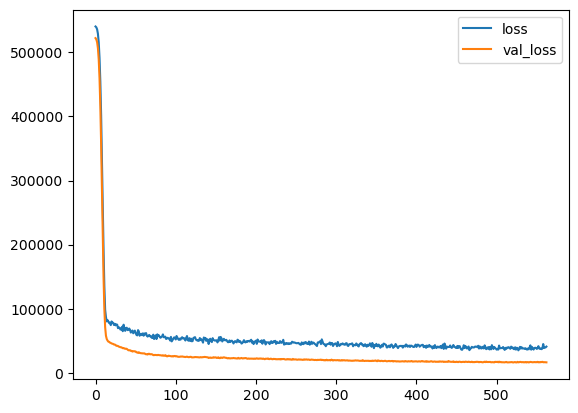

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Conclusion:

With early stopping and 40 layers in both hidden layers we see that after 563 epochs the model begins to overfit to our traning data so we stop the model there.

Also we can see that the model is fairly accurate in predicting both out traning and testing data. We know this because we split the original data set into 2, Traning and testing, and when we analyze the MSE of the validation set (wich is derrived from the traning data set) we see that the predections are failry accurate 

## Evaluation

In [42]:
pred = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(" ---- Confusion Matrix -----")
print(confusion_matrix(y_test, pred))